In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("../")

from utils.preprocessing import *

In [2]:
pose_csv = '../experiments/VideoOutputCamera 0-10112023-145432DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(118443, 12)


### original data table

In [3]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               450.246490  761.854614   
3                                               329.023315  190.026733   
6                                               473.677002  764.505798   
9                                               327.321716  188.656372   
12                                              326.131958  190.437195   
15                                              474.654053  763.319885   
18                                              329.902496  189.972321   
21                                              326.548615  190.106842   
24                                              475.207214  763.163757   
27                                              331.566315  193.257690   
30                                              332.888916  203.114395   
33                                              331.743347  196.584595   
36                                              335.007446  192.001999   
39                                              329.485413  191.073639   
42                                              331.100372  203.186615   
45                                              328.863312  190.252853   
48                                              323.814087  182.830460   
51                                              326.045807  186.335876   
54                                              324.519318  184.389801   
57                                              327.276520  187.640305   
60                                              328.193146  187.950516   
63                                              474.700073  763.768066   
66                                              476.790131  764.753113   
69                                              332.190186  181.809738   
72                                              334.847260  178.585114   
75                                              334.547668  179.325912   
78                                              340.742065  196.355225   
81                                              343.060425  203.794205   
84                                              352.870392  211.634628   
87                                              354.170349  224.920120   
90                                              355.969513  229.871628   
93                                              358.543671  231.404938   
96                                              365.905548  237.027405   
99                                              367.478027  236.030243   
102                                             365.184082  234.182205   
105                                             349.838470  231.638672   
108                                             339.970520  237.981018   
111                                             337.319183  239.446548   
114                                             337.373169  234.580399   
117                                             350.419525  242.761108   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           0.000748    320.824158  186.368515   0.999894   322.148224   
3           0.992366    317.630524  188.707870   0.998432   319.579865   
6           0.018316    319.815826  187.962448   0.999945   321.239319   
9           0.037073    319.342102  190.221634   0.999969   322.397980   
12          0.984140    314.630981  189.525482   0.999428   316.733521   
15          0.003781    318.827637  187.656250   0.999931   321.560974   
18          0.999992    320.516266  188.057526   0.993203   323.511902   
21          0.116942    319.368469  191.506699   0.999998   320.915833   
24 

### after removing likelihood and headers

In [4]:
pose[:5, :]

array([[450.24649048, 761.85461426, 320.82415771, 186.36851501,
        322.14822388, 197.89466858, 273.31710815, 164.91394043,
        285.87594604, 214.70463562, 247.10586548, 195.27185059],
       [326.88262939, 188.64884949, 318.49572754, 187.98756409,
        321.28634644, 198.10237122, 273.73275757, 165.23808289,
        286.2772522 , 215.39306641, 246.70843506, 196.00556946],
       [327.42919922, 188.20452881, 317.98257446, 188.11779785,
        320.07681274, 196.77926636, 274.23455811, 165.10749817,
        286.01864624, 215.34332275, 246.56639099, 196.36779785],
       [329.02331543, 190.0267334 , 317.63052368, 188.70787048,
        319.5798645 , 197.9059906 , 274.30438232, 165.22451782,
        286.25875854, 215.35948181, 246.35812378, 196.57655334],
       [330.81188965, 187.23292542, 321.44177246, 187.58984375,
        324.22665405, 197.81355286, 274.61486816, 164.61395264,
        286.30392456, 215.33416748, 247.15905762, 196.66481018]])

### plot

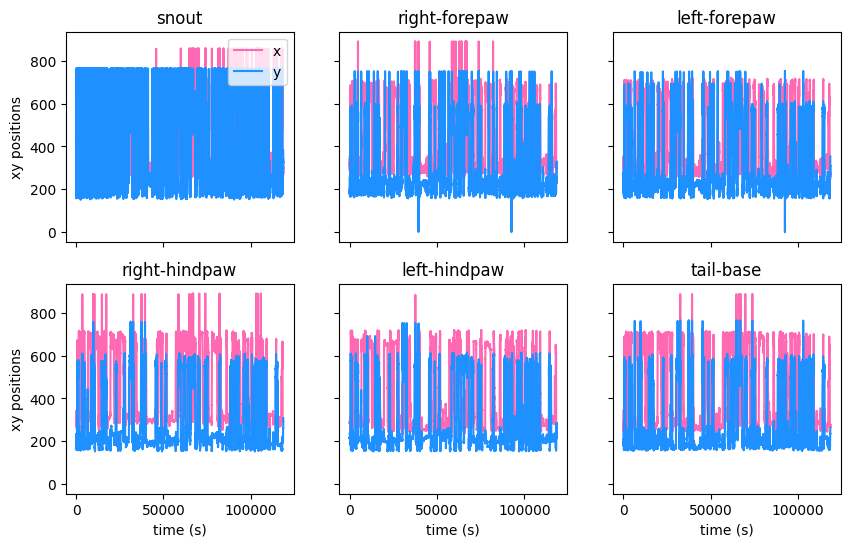

In [5]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [6]:
np.save('../experiments/pose_video_exp.npy', pose)